## 1. Load data

In [1]:
import numpy as np
from helpers import load_csv_data

data_path = "./data/train.csv"
test_path = "./data/test.csv"
sample_path = "./data/sample-submission.csv"

In [2]:
labels, features, ids = load_csv_data(data_path, sub_sample=False)

print(features.shape, labels.shape, ids.shape)
print(features[0], labels[0], ids[0])

(250000, 30) (250000,) (250000,)
[ 1.38470e+02  5.16550e+01  9.78270e+01  2.79800e+01  9.10000e-01
  1.24711e+02  2.66600e+00  3.06400e+00  4.19280e+01  1.97760e+02
  1.58200e+00  1.39600e+00  2.00000e-01  3.26380e+01  1.01700e+00
  3.81000e-01  5.16260e+01  2.27300e+00 -2.41400e+00  1.68240e+01
 -2.77000e-01  2.58733e+02  2.00000e+00  6.74350e+01  2.15000e+00
  4.44000e-01  4.60620e+01  1.24000e+00 -2.47500e+00  1.13497e+02] 1.0 100000


## 2. Preprocess data

mean=57.895961656, std=63.65555430684573
maxmin: [0.0  ,  2834.999]
[-69.41514695769146  ,  185.20707026969146]
outlier proportion: 0.048756


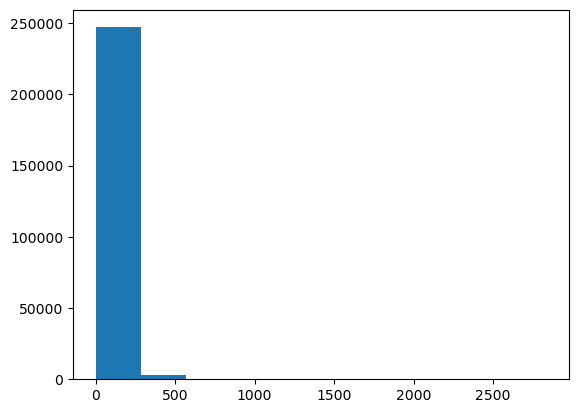

In [20]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt

# Find out outliers
col = 3
mean = features[:,col].mean()
std = features[:,col].std()
print(f"mean={mean}, std={std}")
print(f"maxmin: [{features[:,col].min()}  ,  {features[:,col].max()}]")

factor = 2  # max distance from mean
left = mean - factor * std
right = mean + factor * std
print(f"[{left}  ,  {right}]")
print("outlier proportion:", ((features[:,col] - mean) > factor*std).mean() )

plt.hist(features[:,col])
plt.show()

In [3]:
# normalize data

features_mean = features.mean(axis=0)
features_std = features.std(axis=0)
features = (features - features_mean) / features_std

print(features.mean(axis=0))
print(features.std(axis=0))

[-2.50602916e-15  4.49575133e-15 -3.48448848e-15  7.18646387e-15
 -2.36304576e-14 -3.26035021e-15  1.26038877e-14  2.16223188e-14
  6.40057962e-15  2.86143687e-15 -6.98486646e-15  3.63458152e-15
 -1.27422117e-14 -5.95722149e-15  1.35646161e-16  7.13136217e-17
  2.58023760e-14 -1.06327391e-16 -1.87188487e-16  8.24115935e-15
  1.41040513e-16 -8.99509711e-15 -6.01698247e-16 -4.92204144e-15
  3.11615622e-15 -1.67606551e-15 -9.40773592e-15  1.79148900e-14
 -5.09692022e-15 -1.77122317e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


## 3. Train model with all features

In [4]:
# split data
from helpers import train_test_split
features_tr, features_te, labels_tr, labels_te = train_test_split(labels, features, 0.8, seed=42)
print(features_tr.shape, labels_tr.shape)
print(features_te.shape, labels_te.shape)

(200000, 30) (200000,)
(50000, 30) (50000,)


### 3.1 Least square GD

In [11]:
from helpers import train_test_split, compute_loss, accuracy_score,make_prediction
from implementations import mean_squared_error_gd

max_iter = 1500
gammas = [1e-1, 3e-2, 1e-2, 3e-3, 1e-3]
mse = np.zeros((len(gammas), 2))

initial_w = np.zeros((features.shape[1]))

for i, gamma in enumerate(gammas):

    x_tr, x_te, y_tr, y_te = train_test_split(labels_tr, features_tr, ratio=0.8, seed=42)

    w, l_tr = mean_squared_error_gd(y_tr, x_tr, initial_w, max_iter, gamma)
    l_te = compute_loss(y_te, x_te, w)

    mse[i,:] = [l_tr, l_te]
    acc_tr = accuracy_score(y_tr, make_prediction(x_tr @ w))
    acc_te = accuracy_score(y_te, make_prediction(x_te @ w))

    print(f"gamme: {gamma} \ttrain: [loss={mse[i,0]:.5f}, acc={acc_te:.4f}]\
        \ttest: [loss={mse[i,1]:.5f}, accuracy={acc_te:.4f}]")


gamme: 0.1 	train: [loss=0.38949, acc=0.717]        	test: [loss=0.38896, accuracy=0.717]
gamme: 0.03 	train: [loss=0.38950, acc=0.717]        	test: [loss=0.38899, accuracy=0.717]
gamme: 0.01 	train: [loss=0.39064, acc=0.717]        	test: [loss=0.39050, accuracy=0.717]
gamme: 0.003 	train: [loss=0.39987, acc=0.709]        	test: [loss=0.40087, accuracy=0.709]
gamme: 0.001 	train: [loss=0.41210, acc=0.698]        	test: [loss=0.41359, accuracy=0.698]


In [15]:
# Compute accuracy

gamma = 3e-2
max_iter = 2000
initial_w = np.zeros((features.shape[1]))
w, l_tr = mean_squared_error_gd(labels_tr, features_tr, initial_w, max_iter, gamma)

acc_tr = accuracy_score(labels_tr, make_prediction(features_tr @ w))
acc_te = accuracy_score(labels_te, make_prediction(features_te @ w))

print(f"train acc={acc_tr:.5f}, test acc={acc_te:.5f}")

train acc=0.71775, test acc=0.71778


### 3.2 Least Square SGD

In [ ]:
from helpers import train_test_split, compute_loss, accuracy_score,make_prediction
from implementations import least_squares_SGD



### 3.3 Least Squares with normal equation

In [13]:
from implementations import least_squares

# TODO

### 3.4 Ridge Regression with normal equation

In [ ]:
# TODO

### 3.5 Logistic Regression

In [ ]:
# TODO

### 3.6 Regularized Logisic Regression

In [ ]:
# TODO

## 4. Predict for Submission

In [4]:
# Load test data
_ , features_submit, ids_submit = load_csv_data(test_path, sub_sample=False)

In [5]:
# Choose a model and train it on the whole dataset
# TODO

# Make prediction
pred = None # TODO


# EXample with MSE GD
from implementations import mean_squared_error_gd
gamma = 3e-2
max_iter = 2000
initial_w = np.zeros((features.shape[1]))
w, l_tr = mean_squared_error_gd(labels, features, initial_w, max_iter, gamma)

from helpers import make_prediction
pred = make_prediction(features_submit @ w)

In [6]:
# Write to file 

from helpers import create_csv_submission

create_csv_submission(ids_submit, pred, sample_path)

TypeError: a bytes-like object is required, not 'str'